In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from datetime import date

def calc_age(birthday):
    today = date(1998, 1, 1)
    birthday = list(map(int, birthday.split('-')))
    born = date(birthday[0], birthday[1], birthday[2])
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

%matplotlib inline

In [74]:
features = pd.read_csv('AdvWorksCusts.csv')
label1 = pd.read_csv('AW_AveMonthSpend.csv')
label2 = pd.read_csv('AW_BikeBuyer.csv')

## Feature Cleaning

In [75]:
# drop duplicate customer IDs
print(features.shape)
features = features.drop_duplicates(subset='CustomerID')
features['Age'] = [calc_age(birthday) for birthday in features['BirthDate']]
print(features.shape)
print(features.columns)
features.head()

(16519, 23)
(16404, 24)
Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'Age'],
      dtype='object')


,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,31
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,32
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,32
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,29
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,29


In [76]:
# Identify and drop columns that are mostly empty
for col in features.columns:
    if features[col].dtype == object:
        count = 0
        count = [count + 1 for x in features[col] if pd.isnull(x)]
        if sum(count) > features.shape[0] / 4:
            print(col + ' ' + str(sum(count)))

blank = ['Title', 'MiddleName', 'Suffix', 'AddressLine2', 'FirstName', 'LastName', 'AddressLine1']

def drop_features(df, feature_list):
    print('Shape: {}'.format(df.shape))
    for feature in feature_list:
        df.drop(feature, axis= 1, inplace=True)
        
    print('New shape: {}'.format(df.shape))
    
drop_features(features, blank)


Title 16316
MiddleName 6951
Suffix 16402
AddressLine2 16130
Shape: (16404, 24)
New shape: (16404, 17)


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

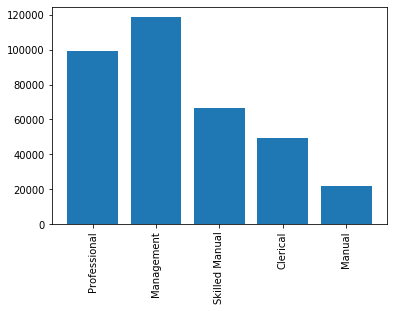

In [5]:
# how many unique features?
#for col in features.columns:
#    print("{}: {}".format(col, features[col].unique().shape[0]))
occupations = features['Occupation'].unique()
med_income = {}
for occupation in occupations:
    med_income[occupation] = np.median(features.loc[features['Occupation'] == occupation]['YearlyIncome'])
plt.bar(med_income.keys(), med_income.values())
plt.xticks(rotation=90)

In [6]:
# which age/gender group spends the most?
def calc_age(birthday):
    today = date(1998, 1, 1)
    birthday = list(map(int, birthday.split('-')))
    born = date(birthday[0], birthday[1], birthday[2])
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

temp = features
temp = temp.merge(label1, how='left', on='CustomerID')
temp['Age'] = [calc_age(birthday) for birthday in temp['BirthDate']]
def mean_spending(frame, age, gender):
    series = frame.loc[(frame['Age'] > age[0]) & (frame['Age'] <= age[1]) & (frame['Gender'] == gender)]['AveMonthSpend']
    meanspend = np.mean(series)
    print('for {} customers between ages {}-{}, mean AveMonthSpend is: {}'.format(gender, age[0], age[1], meanspend))
    return meanspend

mean_spending(temp, [0, 25], 'M')
mean_spending(temp, [25, 45], 'M')
mean_spending(temp, [55, np.max(temp['Age'])], 'M')

mean_spending(temp, [0, 25], 'F')
mean_spending(temp, [25, 45], 'F')
mean_spending(temp, [55, np.max(temp['Age'])], 'F')



for M customers between ages 0-25, mean AveMonthSpend is: 74.91269841269842
for M customers between ages 25-45, mean AveMonthSpend is: 93.75100806451613
for M customers between ages 55-87, mean AveMonthSpend is: 71.39908256880734
for F customers between ages 0-25, mean AveMonthSpend is: 49.6900826446281
for F customers between ages 25-45, mean AveMonthSpend is: 59.86576354679803
for F customers between ages 55-87, mean AveMonthSpend is: 46.17948717948718


46.17948717948718

In [7]:
temp.head()
np.sort(temp['NumberCarsOwned'].unique())

array([0, 1, 2, 3, 4], dtype=int64)

range of male AveMonthSpend: 147
range of female AveMonthSpend: 92


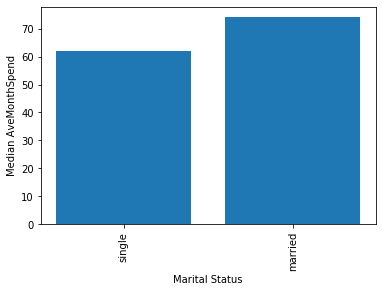

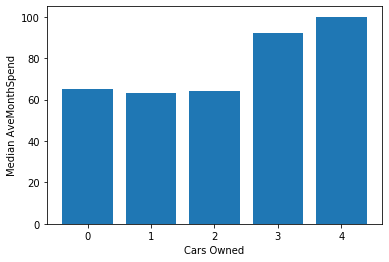

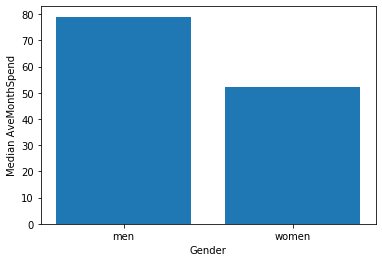

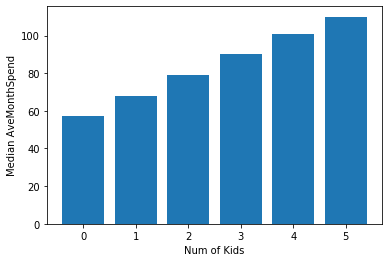

In [24]:
temp = features
temp = temp.merge(label1, how='left', on='CustomerID')

def plot_relation():
    single = temp.loc[temp['MaritalStatus'] == 'S']
    married = temp.loc[temp['MaritalStatus'] == 'M']
    
    plt.figure()
    plt.bar(['single', 'married'], [np.median(single['AveMonthSpend']), np.median(married['AveMonthSpend'])])
    plt.ylabel('Median AveMonthSpend')
    plt.xlabel('Marital Status')
    plt.xticks(rotation=90)
    
def plot_car():
    cars = np.sort(temp['NumberCarsOwned'].unique())
    med_spend = []
    for car in cars:
        series = temp.loc[temp['NumberCarsOwned'] == car]
        med_spend.append(np.median(series['AveMonthSpend']))
        
    plt.figure()
    plt.bar(cars, med_spend)
    plt.ylabel('Median AveMonthSpend')
    plt.xlabel('Cars Owned')
        
def plot_gender():
    men = temp.loc[temp['Gender'] == 'M']
    women = temp.loc[temp['Gender'] == 'F']
    men_sal = np.median(men['AveMonthSpend'])
    wom_sal = np.median(women['AveMonthSpend'])
    
    plt.figure()
    plt.bar(['men', 'women'], [men_sal, wom_sal])
    plt.xlabel('Gender')
    plt.ylabel('Median AveMonthSpend')
    print('range of male AveMonthSpend: {}'.format(np.max(men['AveMonthSpend']) - np.min(men['AveMonthSpend'])))
    print('range of female AveMonthSpend: {}'.format(np.max(women['AveMonthSpend']) - np.min(women['AveMonthSpend'])))
    
def plot_kids():
    kids = np.sort(temp['NumberChildrenAtHome'].unique())
    med_spend = []
    for kid in kids:
        series = temp.loc[temp['NumberChildrenAtHome'] == kid]
        med_spend.append(np.median(series['AveMonthSpend']))
        
    plt.figure()
    plt.bar(kids, med_spend)
    plt.xlabel('Num of Kids')
    plt.ylabel('Median AveMonthSpend')
    
plot_relation()
plot_car()
plot_gender()
plot_kids()

## label1: AveMonthSpend

In [9]:
# drop duplicates rows
print(label1.shape)
label1= label1.drop_duplicates(subset='CustomerID')
print(label1.shape)
print(label1['AveMonthSpend'].isnull().sum())

(16519, 2)
(16404, 2)
0


min AveMonthSpend = 22
max AveMonthSpend = 176
mean AveMonthSpend = 72.3899049012436
median AveMonthSpend = 68.0
std AveMonthSpend = 27.268736937346997


Text(0, 0.5, 'Density')

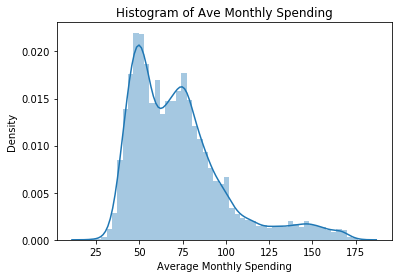

In [10]:
print('min AveMonthSpend = {}'.format(np.min(label1['AveMonthSpend'])))
print('max AveMonthSpend = {}'.format(np.max(label1['AveMonthSpend'])))
print('mean AveMonthSpend = {}'.format(np.mean(label1['AveMonthSpend'])))
print('median AveMonthSpend = {}'.format(np.median(label1['AveMonthSpend'])))
print('std AveMonthSpend = {}'.format(np.std(label1['AveMonthSpend'])))

sns.distplot(label1['AveMonthSpend'])
plt.title('Histogram of Ave Monthly Spending')
plt.xlabel('Average Monthly Spending')
plt.ylabel('Density')

## label2: Bike Buyer

In [11]:
print(label2.shape)
label2 = label2.drop_duplicates(subset='CustomerID')
print(label2.shape)

(16519, 2)
(16404, 2)


In [12]:
label2['BikeBuyer'].value_counts()

0    10953
1     5451
Name: BikeBuyer, dtype: int64

In [54]:
features.head()

,CustomerID,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [61]:
temp[['NumberCarsOwned', 'BikeBuyer']].groupby('NumberCarsOwned').count()

,BikeBuyer
NumberCarsOwned,
0,3833
1,4424
2,5876
3,1459
4,1157


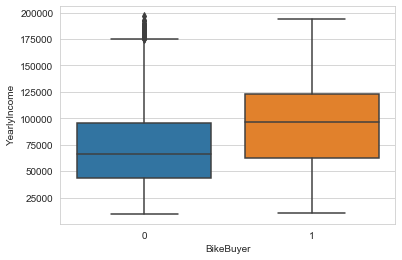

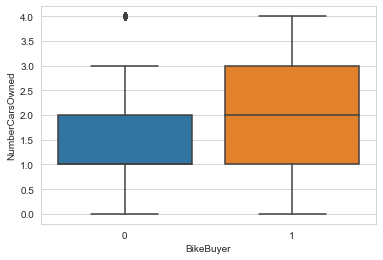

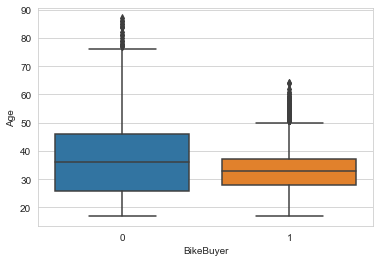

0.24870122692605284 of married folks buy bikes
0.4298883406907297 of single folks buy bikes


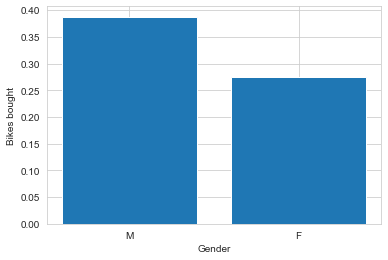

In [62]:
temp = features
temp = temp.merge(label2, how='left', on='CustomerID')
temp['Age'] = [calc_age(birthday) for birthday in temp['BirthDate']]

def plot_box(x, y):
    
    sns.set_style("whitegrid")
    sns.boxplot(x, y, data=temp)
    plt.xlabel(x) # Set text for the x axis
    plt.ylabel(y)# Set text for y axis
    plt.show()
    
def plot_mvf():
    m = temp.loc[temp['Gender'] == 'M']
    f = temp.loc[temp['Gender'] == 'F']
    m_b = np.sum(m['BikeBuyer'])
    f_b = np.sum(f['BikeBuyer'])
    
    plt.figure()
    plt.bar(['M', 'F'], [m_b / m.shape[0], f_b/f.shape[0]])
    plt.xlabel('Gender')
    plt.ylabel('Bikes bought')
    
def married():
    married = temp.loc[temp['MaritalStatus'] == 'M']
    single = temp.loc[temp['MaritalStatus'] == 'S']
    print('{} of married folks buy bikes'.format(np.sum(married['BikeBuyer'])/married.shape[0]))
    print('{} of single folks buy bikes'.format(np.sum(single['BikeBuyer'])/single.shape[0]))
    
plot_box('BikeBuyer', 'YearlyIncome')
plot_box('BikeBuyer', 'NumberCarsOwned')
plot_box('BikeBuyer', 'Age')
plot_mvf()
married()

In [84]:
temp.loc[temp['BikeBuyer'] == 1]['Occupation'].value_counts()
cat_cols = ['Education', 'Occupation', 'Gender', 'MaritalStatus']

def density(df, cat_cols):
    for cat in cat_cols:
        options = df[cat].unique()
        for option in options:
            partial = df.loc[df['BikeBuyer'] == 1][cat].value_counts()[option]
            
            total = df[cat].value_counts()[option]
            print('Density of {} in {}: {}'.format(option, cat, partial/total))
            
density(temp, cat_cols)

Density of Bachelors  in Education: 0.39238683127572016
Density of Partial College in Education: 0.3389010989010989
Density of High School in Education: 0.3020557029177719
Density of Partial High School in Education: 0.23259052924791088
Density of Graduate Degree in Education: 0.30031174229303775
Density of Professional in Occupation: 0.44400396432111
Density of Management in Occupation: 0.37165582067968184
Density of Skilled Manual in Occupation: 0.27967953386744354
Density of Clerical in Occupation: 0.23807735636500188
Density of Manual in Occupation: 0.23515769944341372
Density of M in Gender: 0.3877021125929423
Density of F in Gender: 0.2750120831319478
Density of M in MaritalStatus: 0.24870122692605284
Density of S in MaritalStatus: 0.4298883406907297


In [86]:
num_cols = ['Age', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'NumberCarsOwned']
cat_already_encoded = ['HomeOwnerFlag']

In [85]:
features.columns

Index(['CustomerID', 'City', 'StateProvinceName', 'CountryRegionName',
       'PostalCode', 'PhoneNumber', 'BirthDate', 'Education', 'Occupation',
       'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'Age'],
      dtype='object')